In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [25]:

!unzip '/content/archive (7).zip' -d /content


Streaming output truncated to the last 5000 lines.
  inflating: /content/images/)/)_998.jpg  
  inflating: /content/images/)/)_999.jpg  
  inflating: /content/images/+/+_1.jpg  
  inflating: /content/images/+/+_10.jpg  
  inflating: /content/images/+/+_100.jpg  
  inflating: /content/images/+/+_1000.jpg  
  inflating: /content/images/+/+_1001.jpg  
  inflating: /content/images/+/+_1002.jpg  
  inflating: /content/images/+/+_1003.jpg  
  inflating: /content/images/+/+_1004.jpg  
  inflating: /content/images/+/+_1005.jpg  
  inflating: /content/images/+/+_1006.jpg  
  inflating: /content/images/+/+_1007.jpg  
  inflating: /content/images/+/+_1008.jpg  
  inflating: /content/images/+/+_1009.jpg  
  inflating: /content/images/+/+_101.jpg  
  inflating: /content/images/+/+_1010.jpg  
  inflating: /content/images/+/+_1011.jpg  
  inflating: /content/images/+/+_1012.jpg  
  inflating: /content/images/+/+_1013.jpg  
  inflating: /content/images/+/+_1014.jpg  
  inflating: /content/images/+/+_1

Classes found: ['(', ')', '+', '-', 'x', '÷']
✅ Dataset loaded successfully!
X shape: (7366, 45, 45, 1)
y shape: (7366,)
Train/Test split done!
Training samples: 5892
Testing samples: 1474


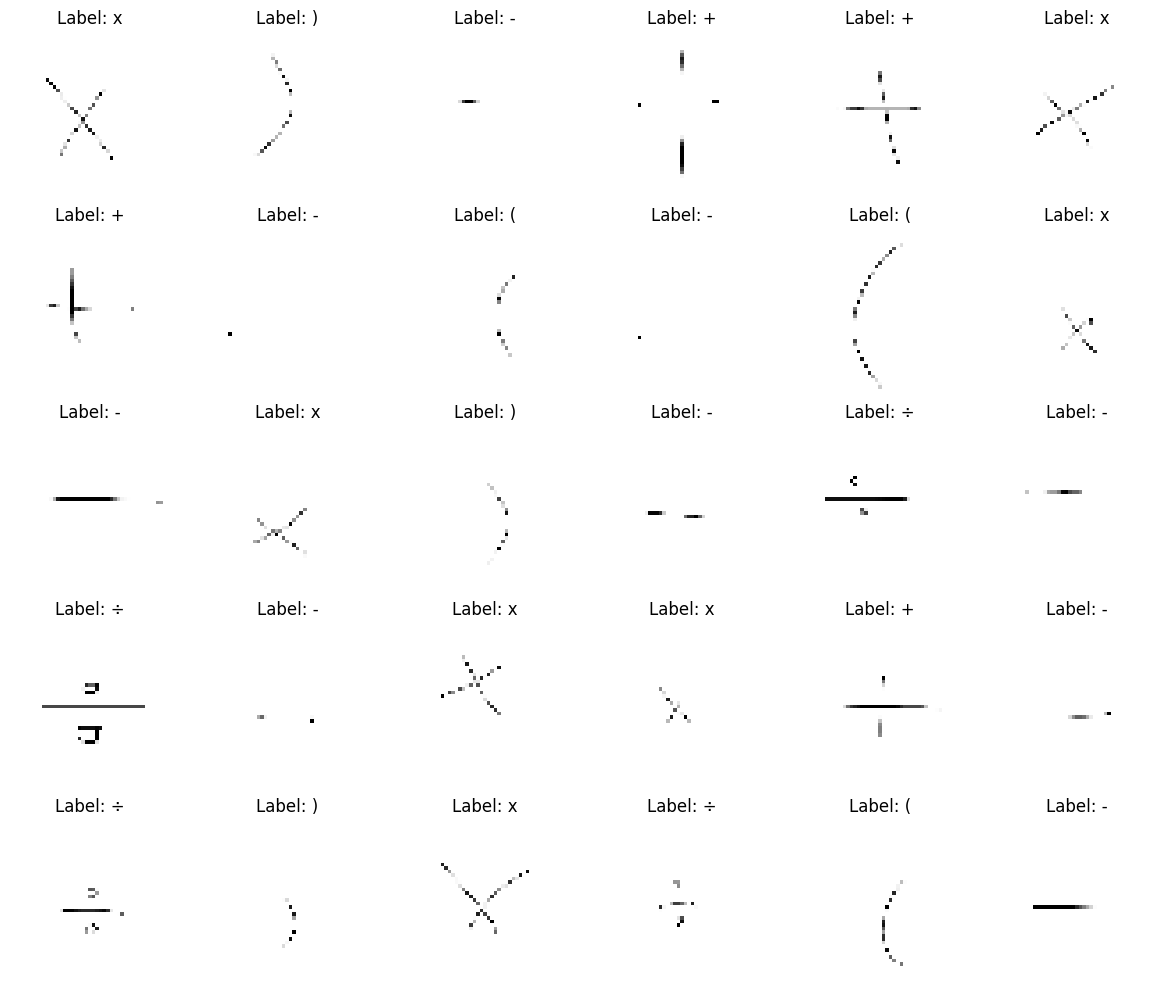

In [30]:

# ✅ Step 1: Unzip Dataset
dataset_path = "archive (7).zip"  # Make sure this name matches your file

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("temp_dataset")

# ✅ Step 2: Set Path to Image Folder
image_root = os.path.join("temp_dataset", "images")
classes = sorted(os.listdir(image_root))  # Sorted for consistent label order
print("Classes found:", classes)

# ✅ Step 3: Load Images and Labels
X = []
y = []

for label, cls in enumerate(classes):
    class_folder = os.path.join(image_root, cls)

    if not os.path.isdir(class_folder):
        continue

    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (45, 45))
                X.append(img)
                y.append(label)
            else:
                print(f"❌ Failed to load image: {img_path}")
        else:
            print(f"⏭️ Skipping non-image file: {img_path}")

# ✅ Step 4: Preprocess and Split
X = np.array(X).reshape(-1, 45, 45, 1) / 255.0
y = np.array(y)

print("✅ Dataset loaded successfully!")
print("X shape:", X.shape)
print("y shape:", y.shape)

# ✅ Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train/Test split done!")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# ✅ Step 6: Show 30 Random Training Images with Labels
indices = list(range(len(X_train)))
random.shuffle(indices)

plt.figure(figsize=(12, 10))
for i in range(30):
    idx = indices[i]
    plt.subplot(5, 6, i + 1)  # 5 rows, 6 columns = 30 slots
    plt.imshow(X_train[idx].reshape(45, 45), cmap='gray', interpolation='nearest')
    plt.title(f"Label: {classes[y_train[idx]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
num_classes = len(classes)
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ✅ Step 1: Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(45, 45, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

# ✅ Step 2: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Step 3: Train the model
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32,
                    validation_data=(X_test, y_test_cat))

# ✅ Step 4: Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=2)
print(f"\n🎯 Test Accuracy: {test_acc * 100:.2f}%")

# ✅ Step 5: Save the model (optional)
model.save("math_symbol_cnn_model.h5")


Epoch 1/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.3254 - loss: 1.5631 - val_accuracy: 0.7809 - val_loss: 0.5532
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.8214 - loss: 0.5198 - val_accuracy: 0.9125 - val_loss: 0.2657
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.8958 - loss: 0.3055 - val_accuracy: 0.9023 - val_loss: 0.2641
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.9188 - loss: 0.2509 - val_accuracy: 0.9023 - val_loss: 0.2631
Epoch 5/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.9262 - loss: 0.2243 - val_accuracy: 0.9355 - val_loss: 0.2028
Epoch 6/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.9381 - loss: 0.1954 - val_accuracy: 0.9498 - val_loss: 0.1629
Epoch 7/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.9494 - loss: 0.1646 - val_accuracy: 0.9559 - val_loss: 0.1443
Epoch 8/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - accuracy: 0.9518 - loss: 0.1511


🎯 Test Accuracy: 96.13%


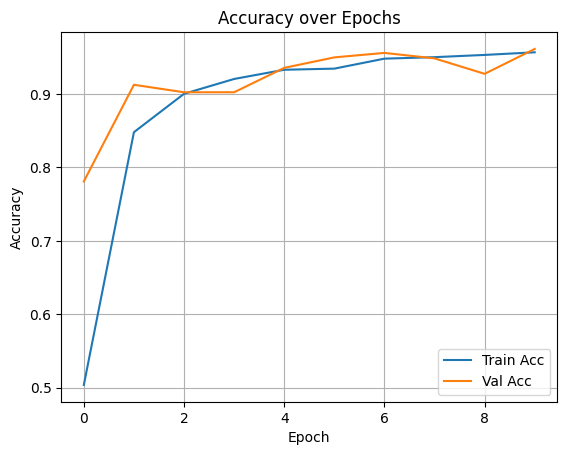

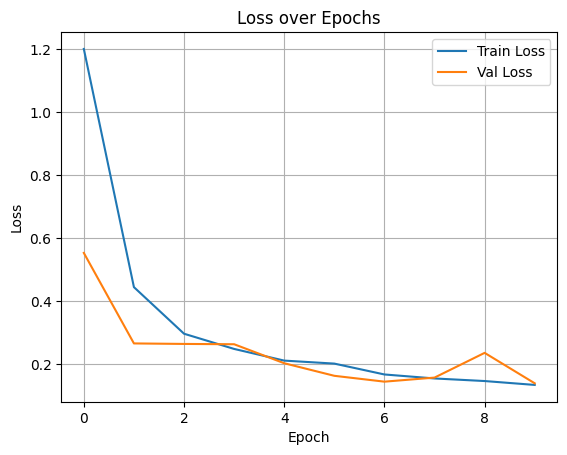

In [32]:

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
